In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
df=pd.read_csv("avocado.csv")

In [6]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.shape

(18249, 14)

In [9]:
target1=df["AveragePrice"]
target1=df["region"]

working on regression prdiction on averageprice

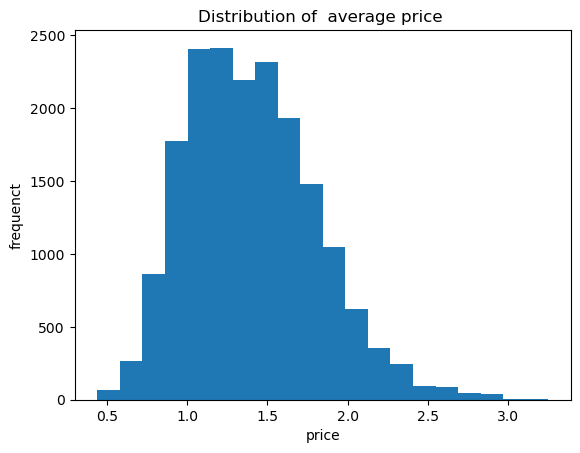

In [10]:
plt.hist(df["AveragePrice"],bins=20)
plt.title("Distribution of  average price ")
plt.xlabel("price")
plt.ylabel("frequenct")
plt.show()

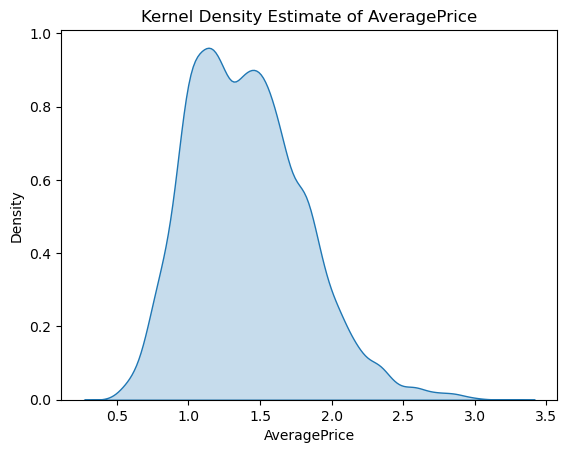

In [11]:
sns.kdeplot(df["AveragePrice"], fill=True)  # KDE Plot
plt.title("Kernel Density Estimate of AveragePrice")
plt.xlabel("AveragePrice")
plt.ylabel("Density")
plt.show()


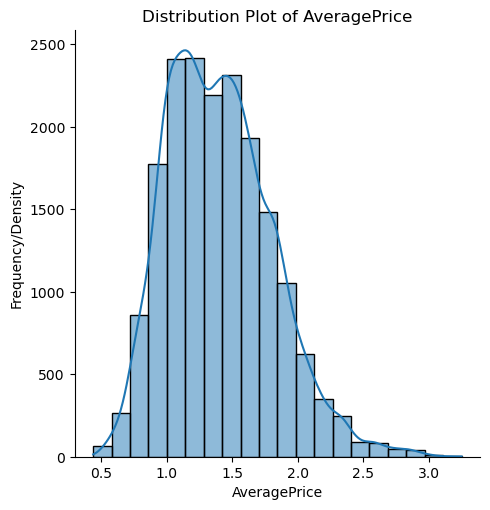

In [12]:
sns.displot(df["AveragePrice"], bins=20, kde=True)
plt.title("Distribution Plot of AveragePrice")
plt.xlabel("AveragePrice")
plt.ylabel("Frequency/Density")
plt.show()


In [13]:
df["Date"]

0        2015-12-27
1        2015-12-20
2        2015-12-13
3        2015-12-06
4        2015-11-29
            ...    
18244    2018-02-04
18245    2018-01-28
18246    2018-01-21
18247    2018-01-14
18248    2018-01-07
Name: Date, Length: 18249, dtype: object

In [14]:
df["year"].nunique()

4

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [17]:
df['Year'] = df['Date'].dt.year


In [18]:
import pandas as pd

for index, (year_val, year_val_lowercase) in enumerate(zip(df['Year'], df['year'])):
    if year_val != year_val_lowercase:
        print(f"Index {index}: 'Year' value ({year_val}) is not equal to 'year' value ({year_val_lowercase})")


In [19]:
df.columns


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'Year'],
      dtype='object')

In [20]:
df.drop(["Year",'year'],axis=1,inplace=True)

In [21]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

In [22]:
df.iloc[:,0:1].value_counts()

Unnamed: 0
0             432
7             432
1             432
11            432
9             432
8             432
10            432
6             432
5             432
4             432
3             432
2             432
41            324
34            324
35            324
36            324
37            324
38            324
39            324
40            324
47            324
42            324
43            324
44            324
45            324
46            324
32            324
48            324
49            324
50            324
33            324
26            324
31            324
30            324
12            324
13            324
14            324
15            324
16            324
17            324
18            324
19            324
20            324
21            324
22            324
23            324
24            324
25            324
27            324
28            324
29            324
51            322
52            107
Name: count, dtype: int64

<Axes: xlabel='Unnamed: 0', ylabel='AveragePrice'>

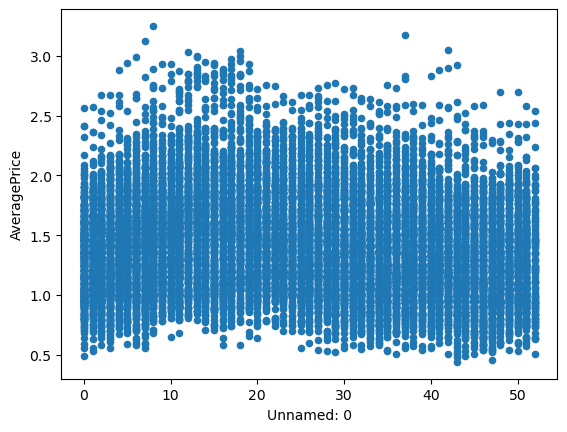

In [23]:
df.plot.scatter(x=df.columns[0], y=df.columns[2])


In [24]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [25]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


In [26]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [28]:
df["region"].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 1.7+ MB


In [30]:
def separate_variables(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    datetime_cols = df.select_dtypes(include=['datetime']).columns

    return {
        'numeric': numeric_cols,
        'categorical': categorical_cols,
        'datetime': datetime_cols
    }

In [31]:
result = separate_variables(df)
print("Numeric Columns:", result['numeric'])
print("Categorical Columns:", result['categorical'])
print("Datetime Columns:", result['datetime'])


Numeric Columns: Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')
Categorical Columns: Index(['type', 'region'], dtype='object')
Datetime Columns: Index(['Date'], dtype='object')


In [32]:
df.isnull().sum()


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

In [33]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
min,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652


In [34]:
df["XLarge Bags"].value_counts()

XLarge Bags
0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: count, Length: 5588, dtype: int64

<Axes: xlabel='type'>

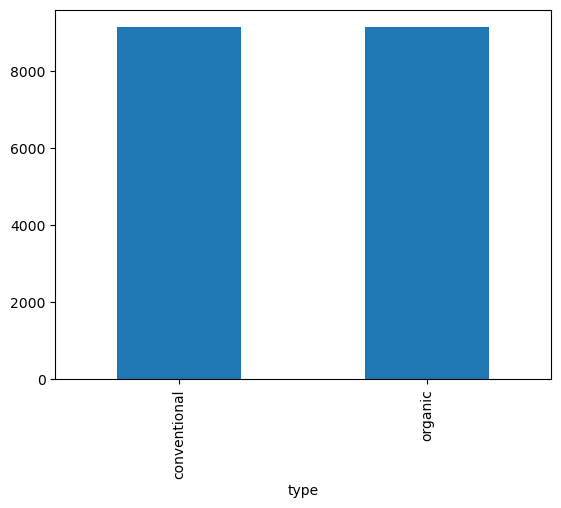

In [35]:
df["type"].value_counts().plot(kind='bar')


<Axes: xlabel='region'>

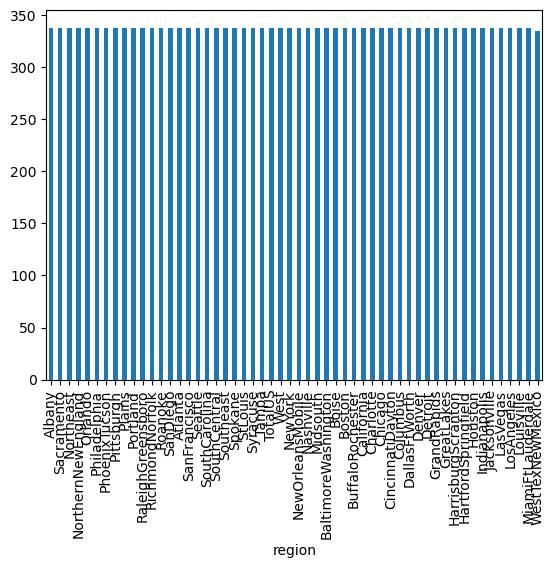

In [36]:
df["region"].value_counts().plot(kind='bar')


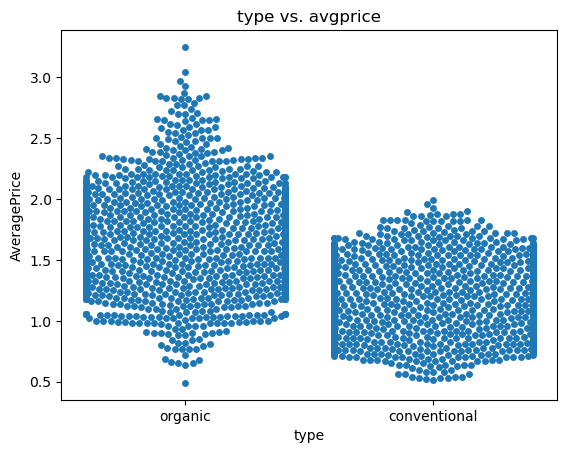

In [37]:
sns.swarmplot(x='type', y='AveragePrice', data=df.sample(frac=0.2))  # Adjust the fraction as needed
plt.title('type vs. avgprice')
plt.show()


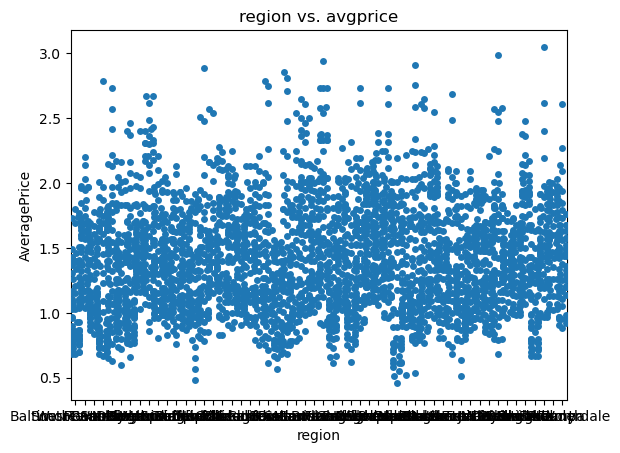

In [38]:
sns.swarmplot(x='region', y='AveragePrice', data=df.sample(frac=0.2))  # Adjust the fraction as needed
plt.title('region vs. avgprice')
plt.show()

AveragePrice


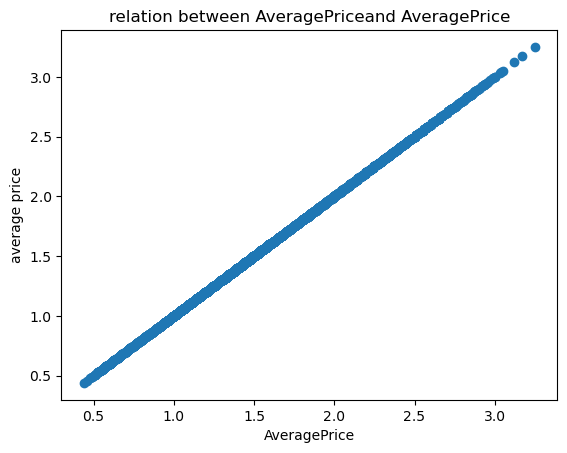

Total Volume


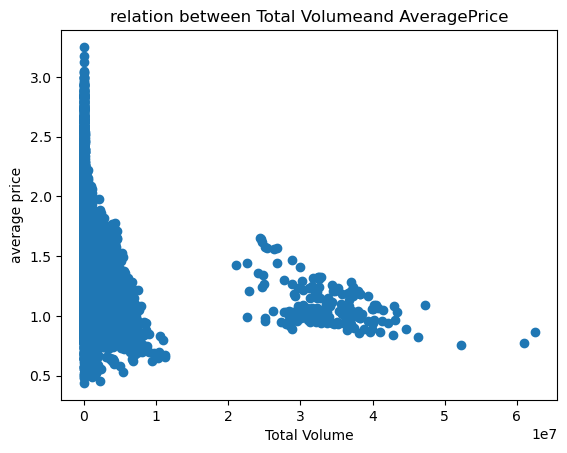

4046


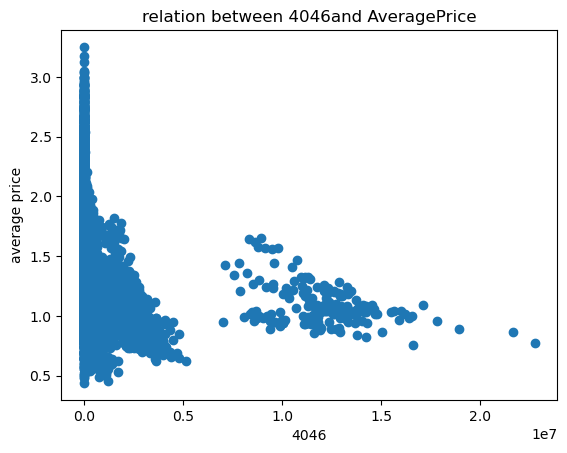

4225


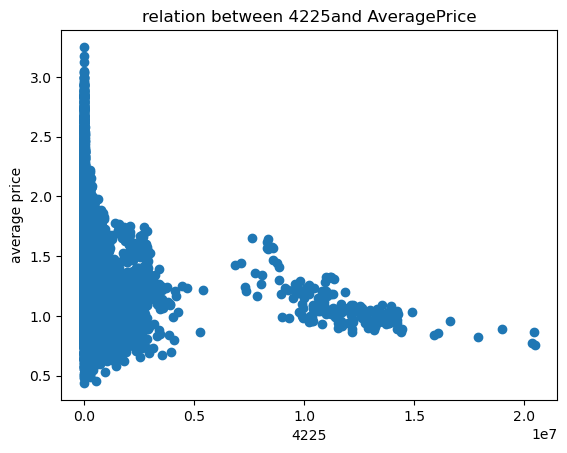

4770


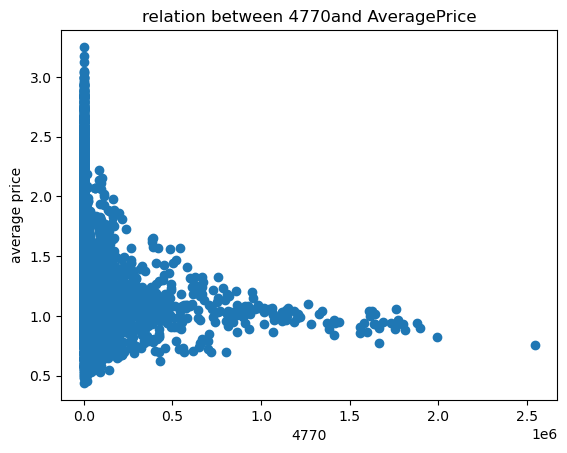

Total Bags


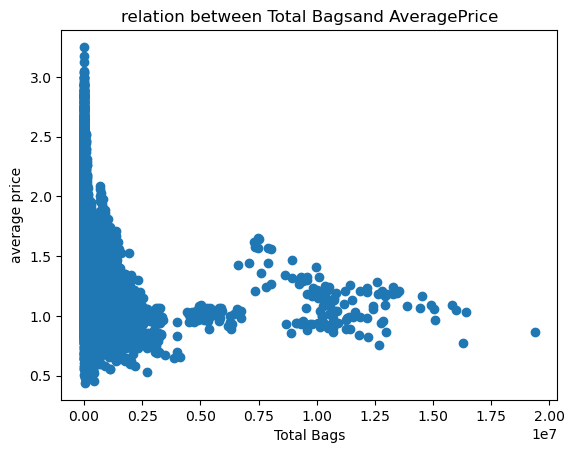

Small Bags


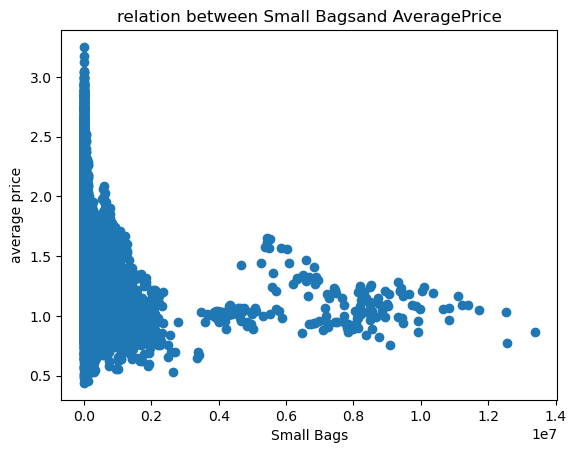

Large Bags


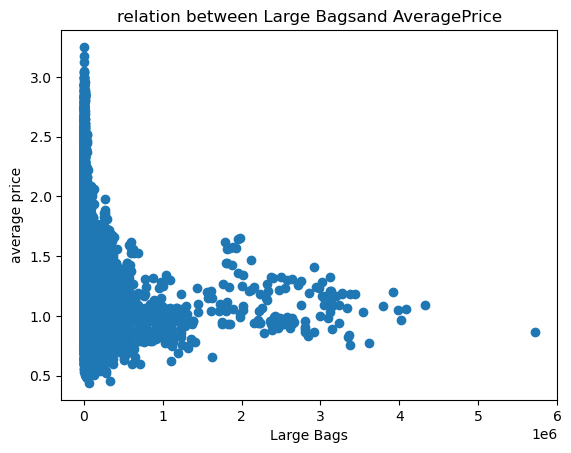

XLarge Bags


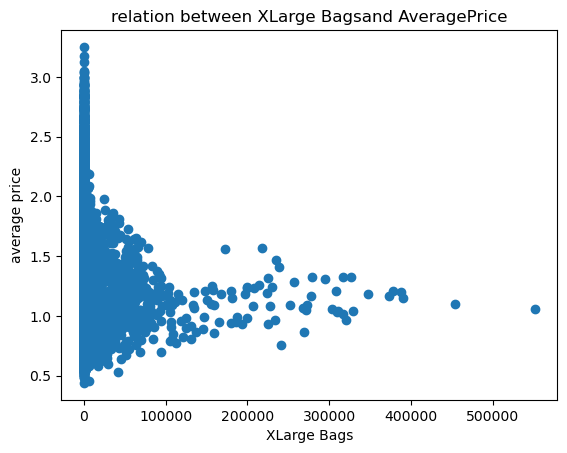

In [39]:
for x in result['numeric']:
    print(x)
    plt.scatter(x=df[x],y=df["AveragePrice"])
    plt.xlabel(x)
    plt.ylabel("average price")
    plt.title(f"relation between {x}and AveragePrice")
    plt.show()


AveragePrice


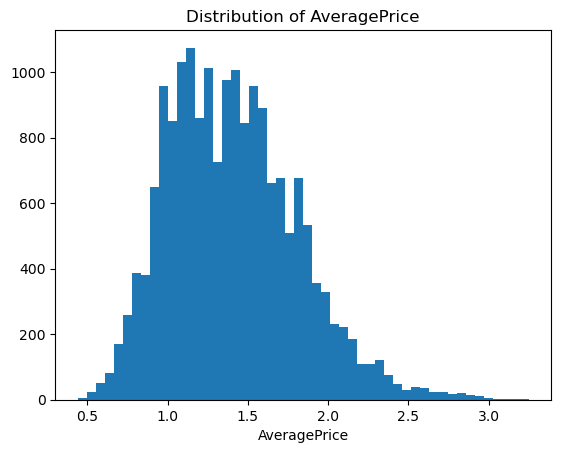

Total Volume


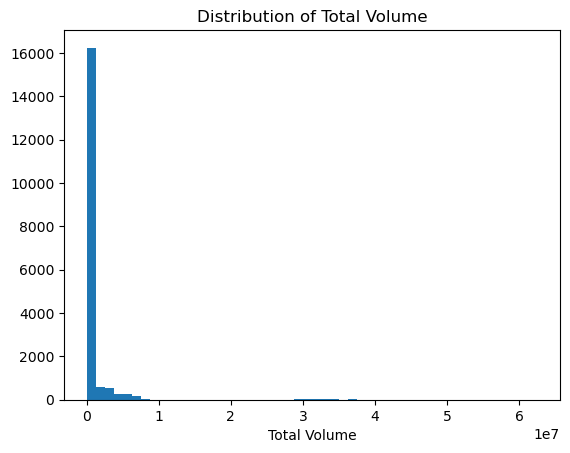

4046


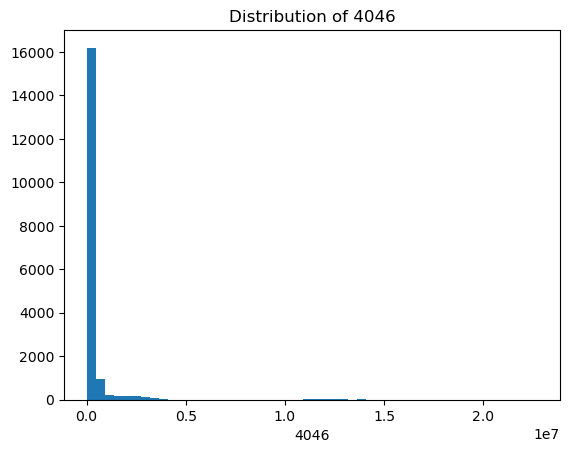

4225


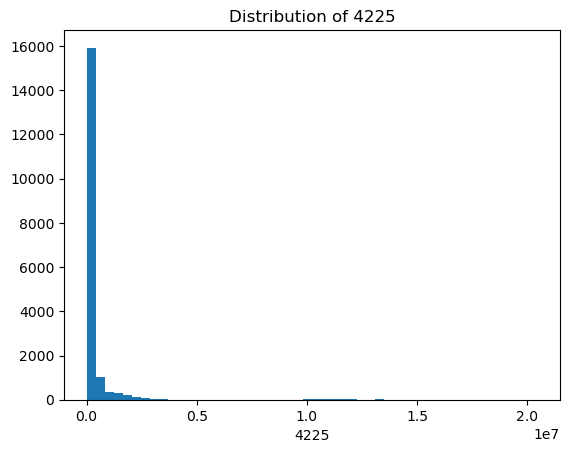

4770


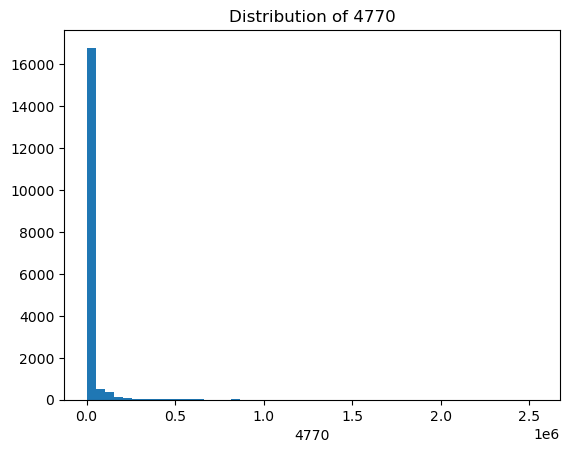

Total Bags


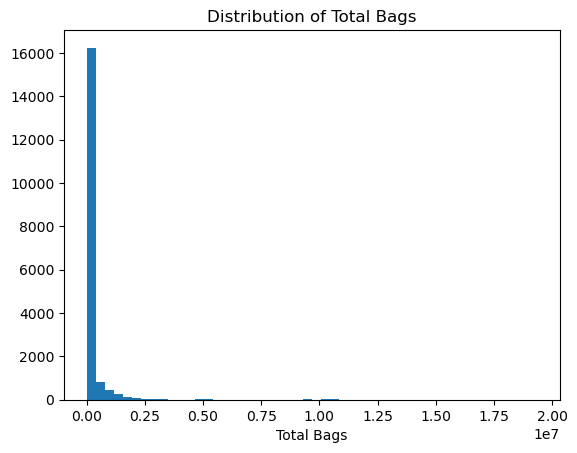

Small Bags


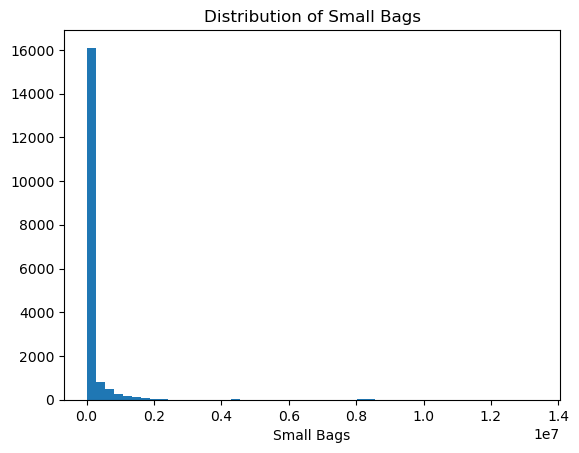

Large Bags


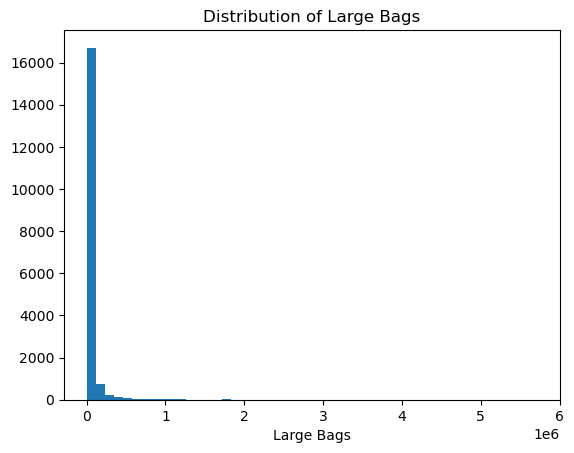

XLarge Bags


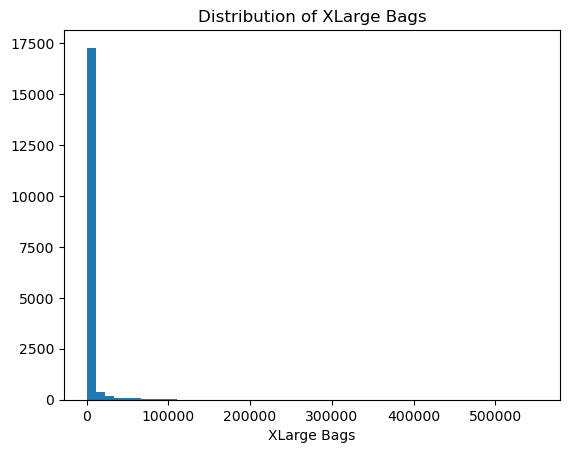

In [40]:
for x in result['numeric']:
    print(x)
    plt.hist(df[x],bins=50)
    plt.xlabel(x)
    plt.title(f"Distribution of {x}")
    plt.show()

In [41]:
for x in result['numeric']:
    zero_count=(df[x]==0).sum()
    print(x,zero_count)


AveragePrice 0
Total Volume 0
4046 242
4225 61
4770 5497
Total Bags 15
Small Bags 159
Large Bags 2370
XLarge Bags 12048


In [42]:
(df["XLarge Bags"]>0).value_counts()

XLarge Bags
False    12048
True      6201
Name: count, dtype: int64

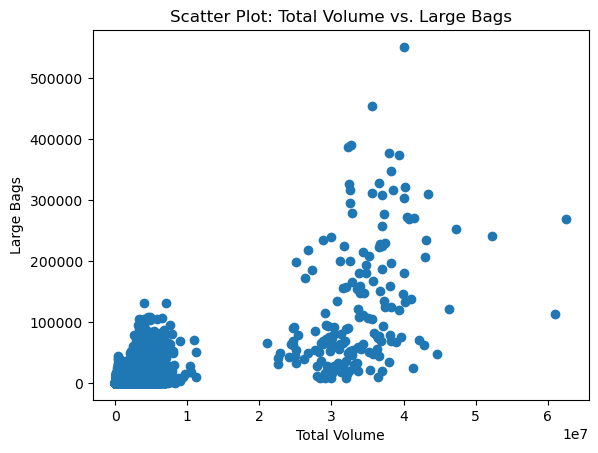

In [43]:
plt.scatter(x=df["Total Volume"],y=df["XLarge Bags"])
plt.xlabel("Total Volume")
plt.ylabel("Large Bags")
plt.title("Scatter Plot: Total Volume vs. Large Bags")
plt.show()

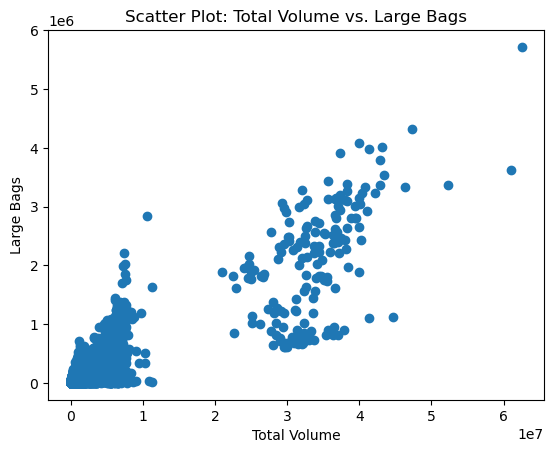

In [44]:
plt.scatter(x=df["Total Volume"],y=df["Large Bags"])
plt.xlabel("Total Volume")
plt.ylabel("Large Bags")
plt.title("Scatter Plot: Total Volume vs. Large Bags")
plt.show()

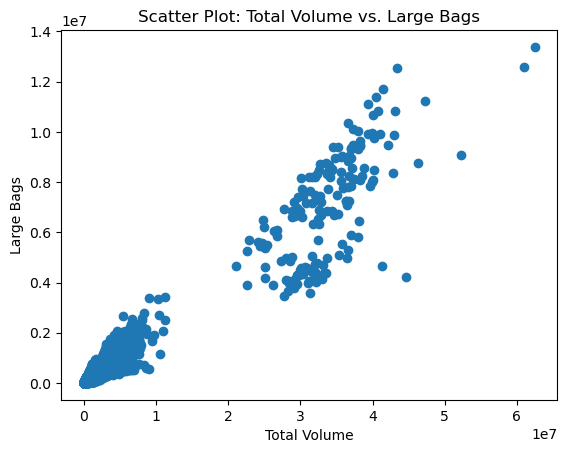

In [45]:
plt.scatter(x=df["Total Volume"],y=df["Small Bags"])
plt.xlabel("Total Volume")
plt.ylabel("Large Bags")
plt.title("Scatter Plot: Total Volume vs. Large Bags")
plt.show()

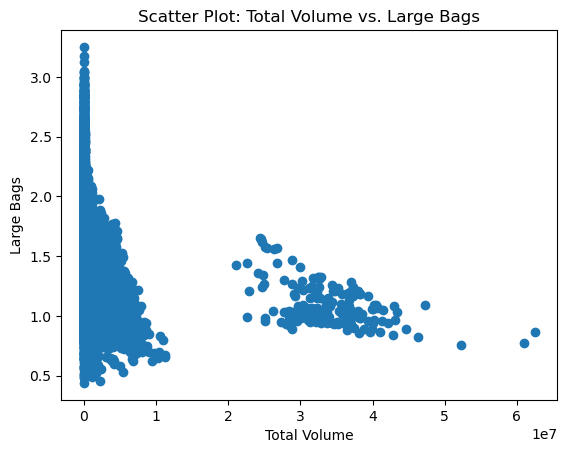

In [46]:
plt.scatter(x=df["Total Volume"],y=df["AveragePrice"])
plt.xlabel("Total Volume")
plt.ylabel("Large Bags")
plt.title("Scatter Plot: Total Volume vs. Large Bags")
plt.show()

TypeError: ylabel() missing 1 required positional argument: 'ylabel'

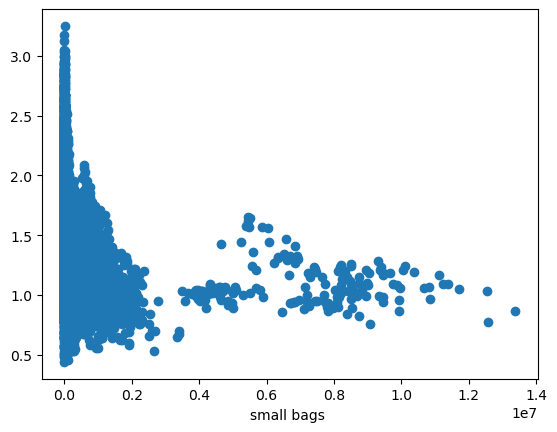

In [47]:
plt.scatter(x=df["Small Bags"],y=df["AveragePrice"])
plt.xlabel("small bags ")
plt.ylabel()

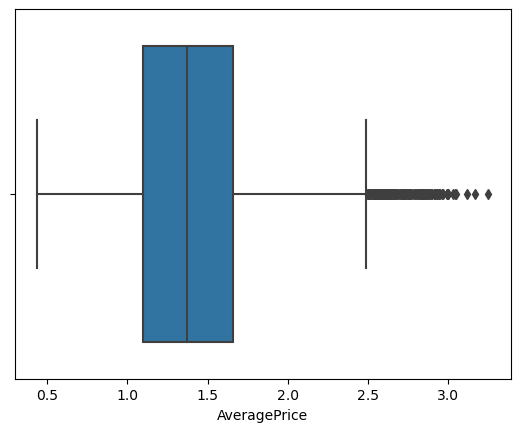

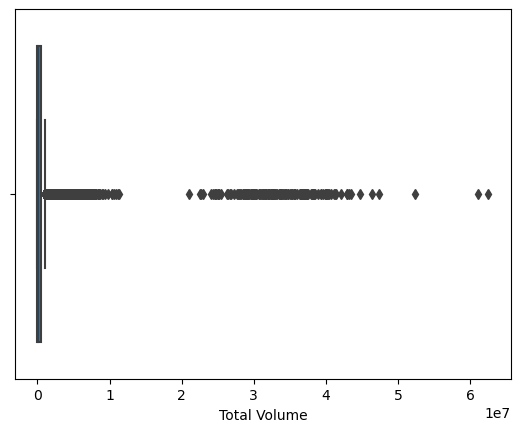

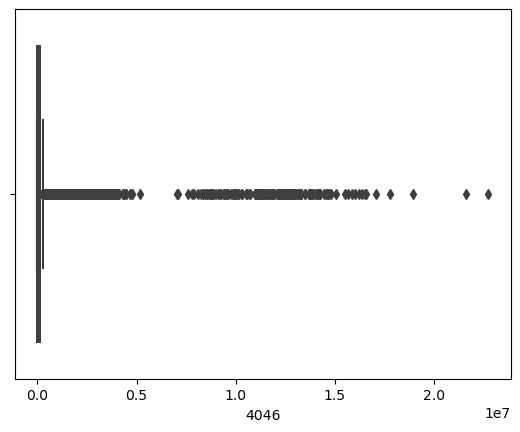

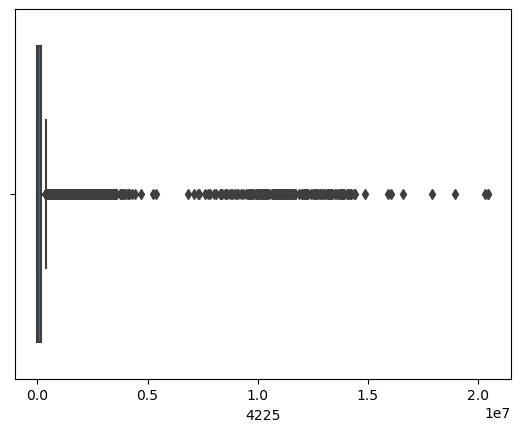

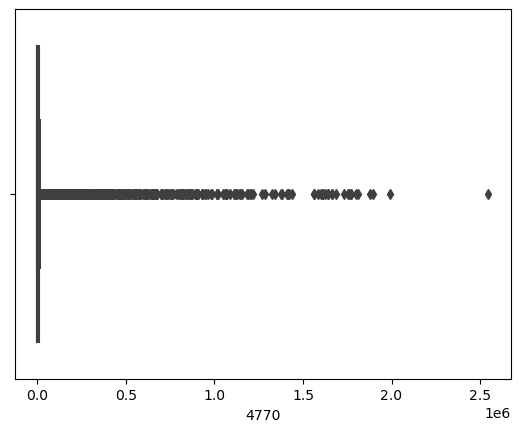

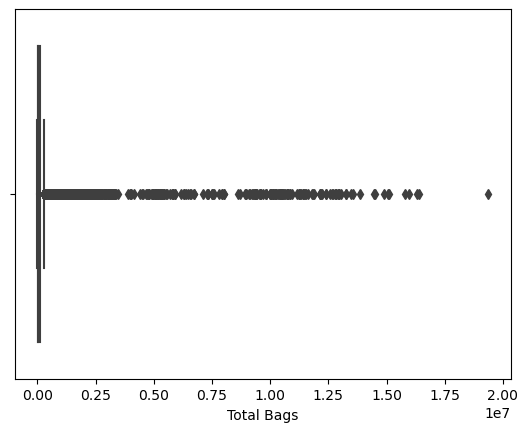

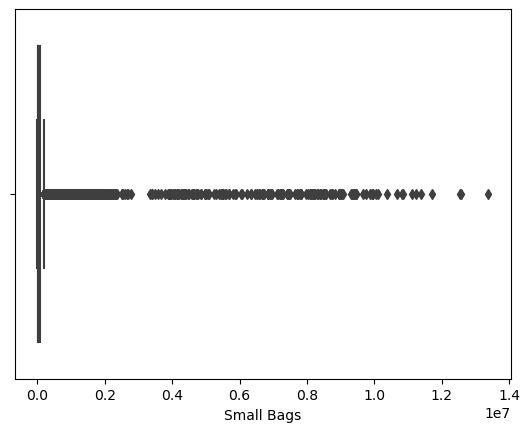

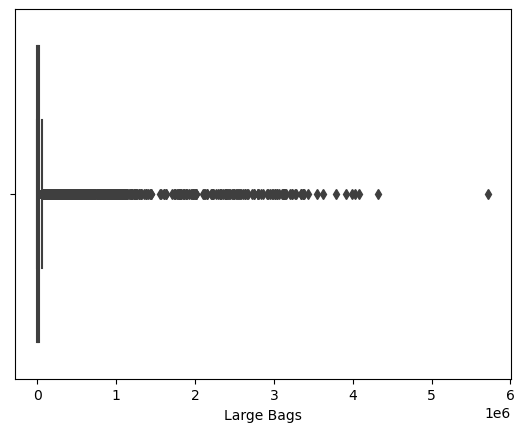

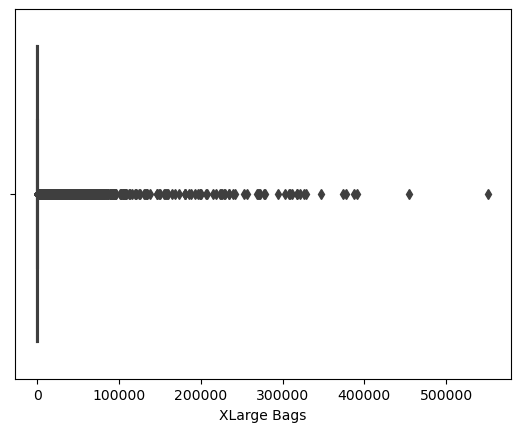

In [48]:
for x in result['numeric']:
    sns.boxplot(x=df[x])
    plt.show()

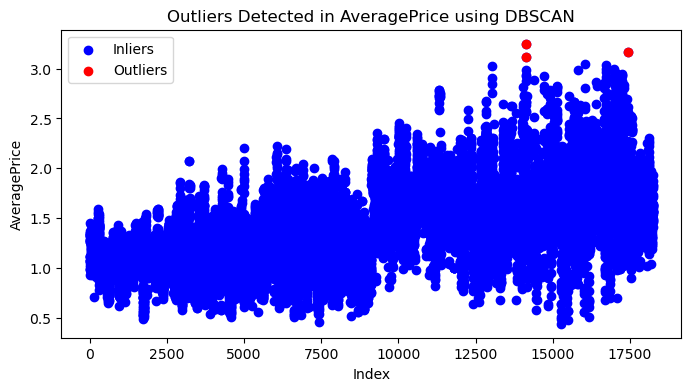

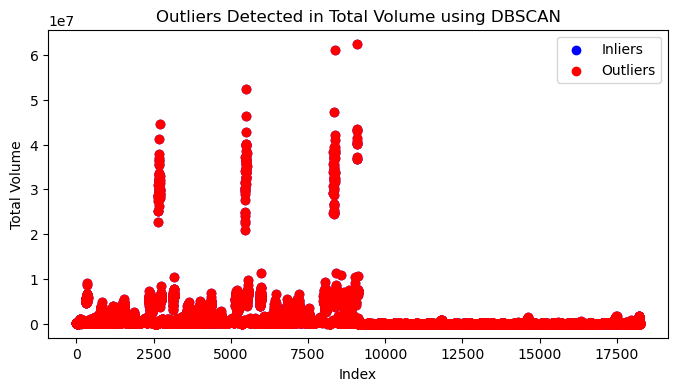

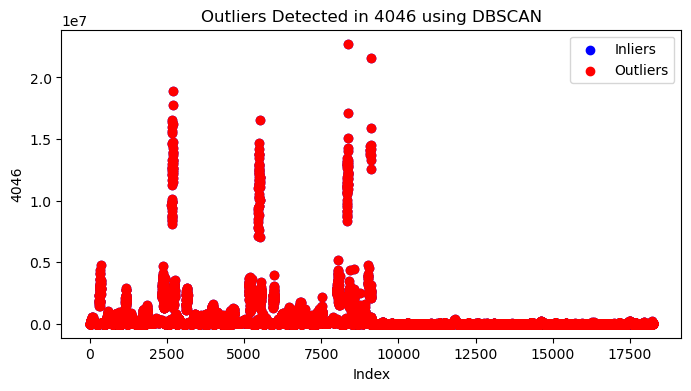

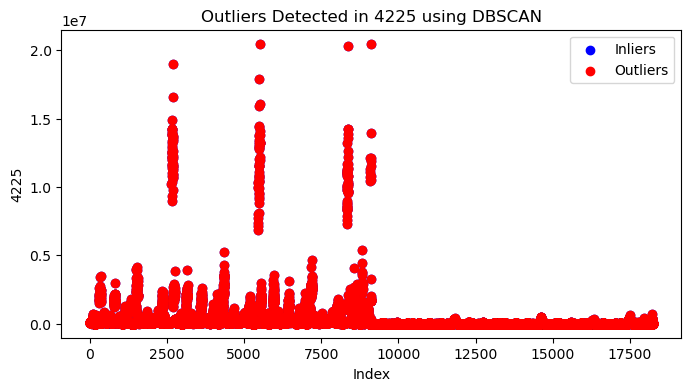

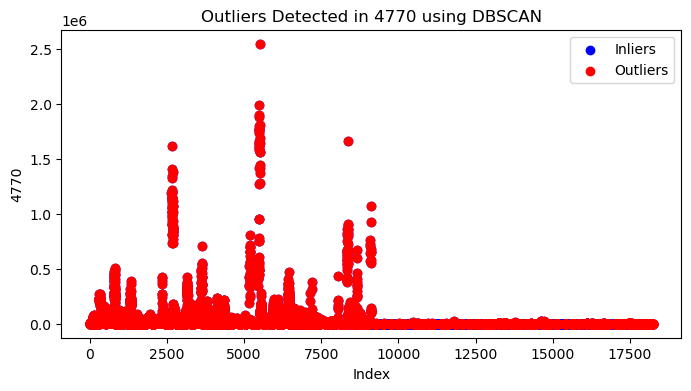

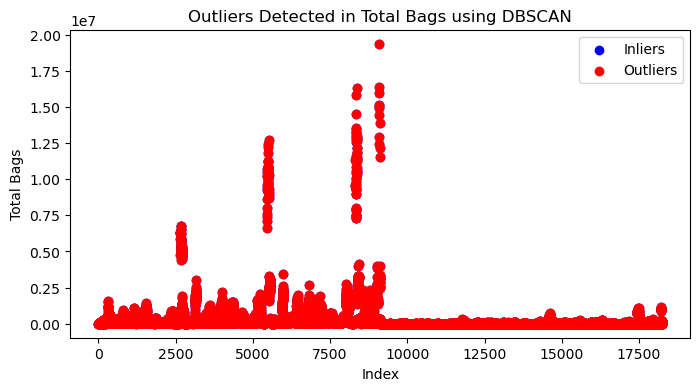

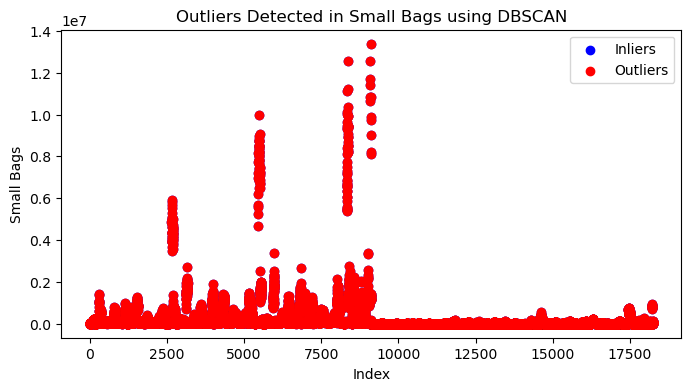

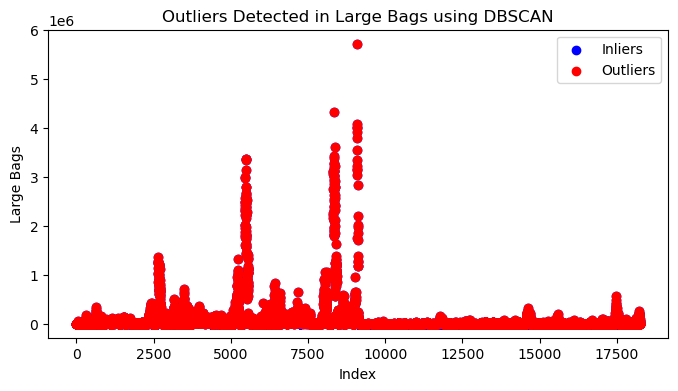

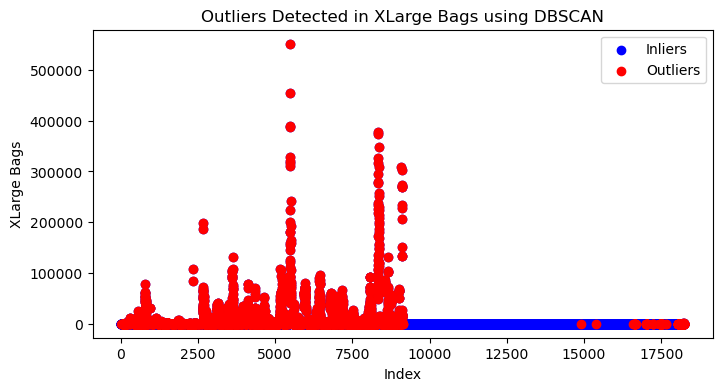

Number of outliers in AveragePrice: 3
Number of outliers in Total Volume: 18249
Number of outliers in 4046: 17823
Number of outliers in 4225: 18177
Number of outliers in 4770: 12055
Number of outliers in Total Bags: 18234
Number of outliers in Small Bags: 18048
Number of outliers in Large Bags: 15227
Number of outliers in XLarge Bags: 5970


In [49]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_columns])

eps = 0.05  
min_samples = 10  

outliers_dict = {}  
outliers_count_dict = {}  

for col in numeric_columns:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df[col].values.reshape(-1, 1))

    outliers = df[col][labels == -1]
    outliers_dict[col] = outliers

    outliers_count = sum(labels == -1)
    outliers_count_dict[col] = outliers_count

for col, outliers in outliers_dict.items():
    plt.figure(figsize=(8, 4))
    plt.scatter(df.index, df[col], label="Inliers", color='blue')
    plt.scatter(outliers.index, outliers, label="Outliers", color='red')
    plt.title(f"Outliers Detected in {col} using DBSCAN")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.legend()
    plt.show()

for col, count in outliers_count_dict.items():
    print(f"Number of outliers in {col}: {count}")


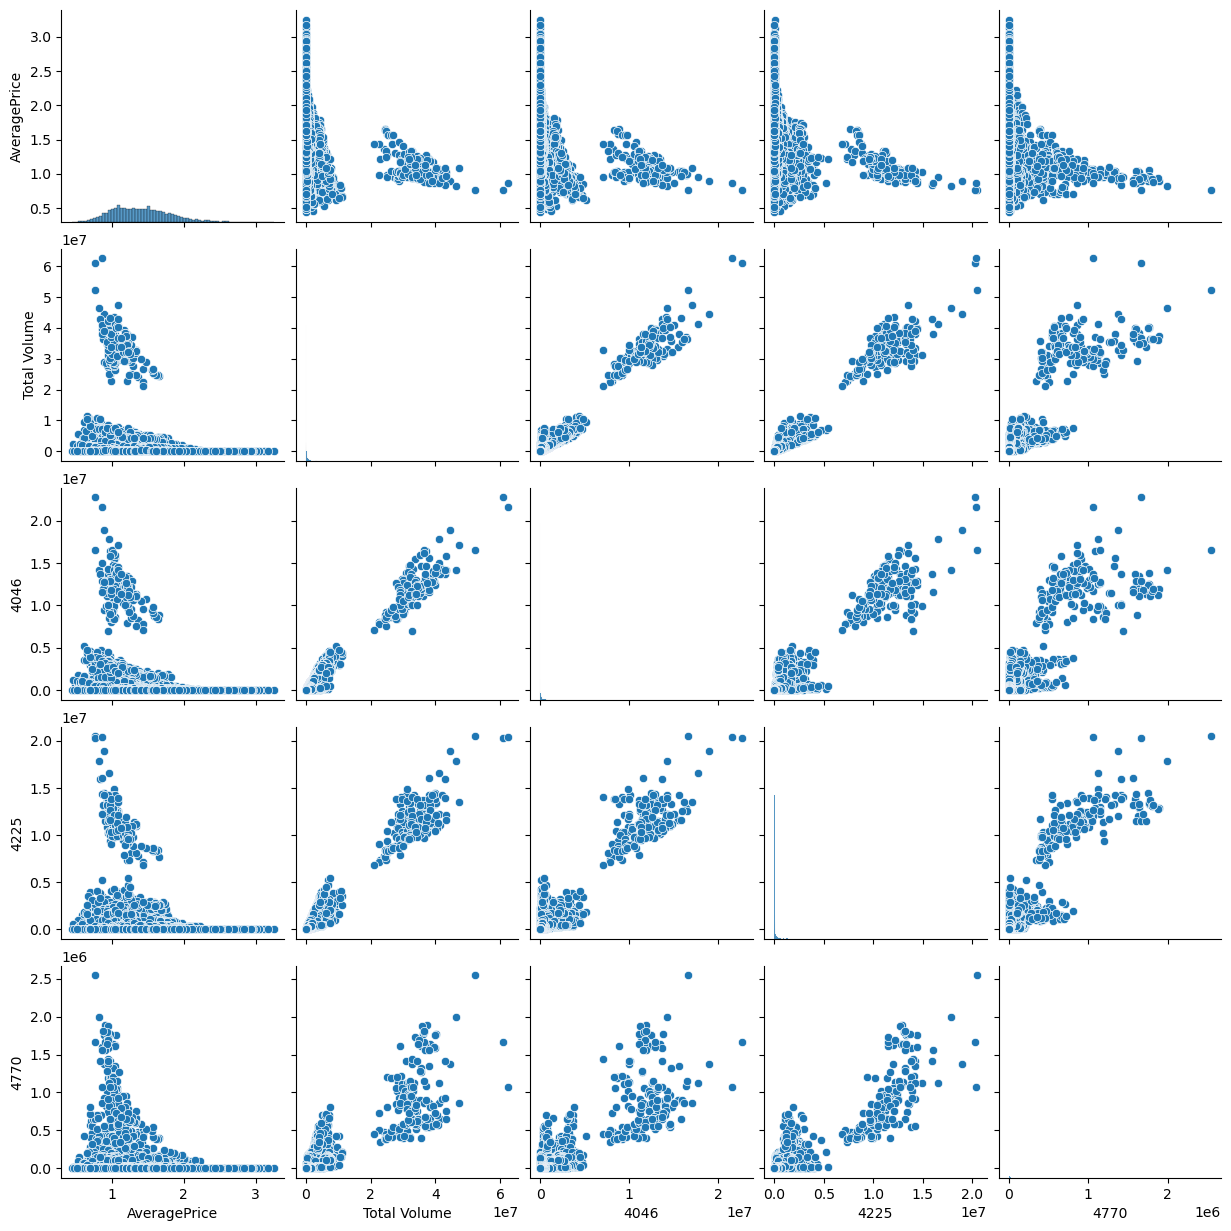

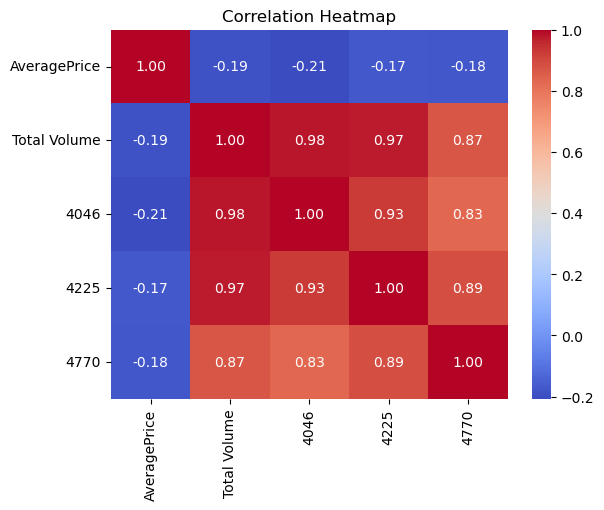

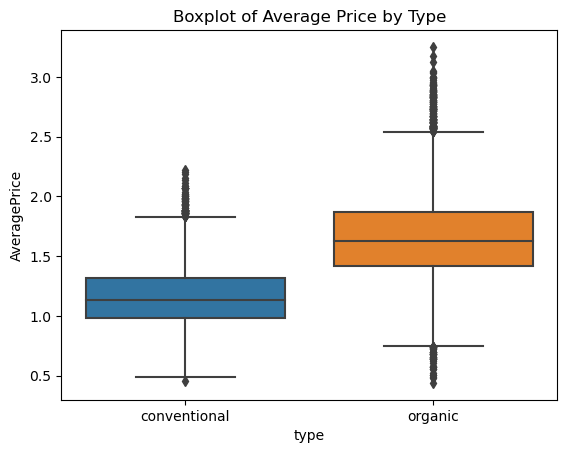

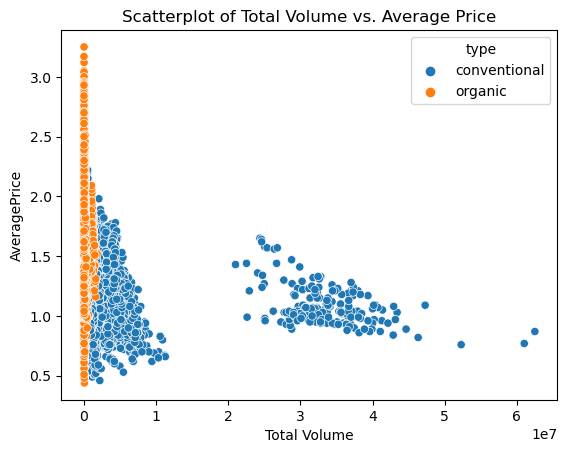

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



sns.pairplot(df[['AveragePrice', 'Total Volume', '4046', '4225', '4770']])
plt.show()

correlation_matrix = df[['AveragePrice', 'Total Volume', '4046', '4225', '4770']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title("Boxplot of Average Price by Type")
plt.show()

sns.scatterplot(x='Total Volume', y='AveragePrice', hue='type', data=df)
plt.title("Scatterplot of Total Volume vs. Average Price")
plt.show()




In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 1.7+ MB


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import HuberRegressor, LinearRegression, RANSACRegressor, TheilSenRegressor, Lasso, Ridge, ElasticNet, Lars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Total Volume', '4046', '4225', '4770', 'type']]  # Adjust features as needed
y = df['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Total Volume', '4046', '4225', '4770']
categorical_features = ['type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

regression_models = [
    ('RandomForest', Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])),
    ('GradientBoosting', Pipeline([('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor())])),
    ('SVR', Pipeline([('preprocessor', preprocessor), ('regressor', SVR())])),
    ('HuberRegressor', Pipeline([('preprocessor', preprocessor), ('regressor', HuberRegressor())])),
    ('LinearRegression', Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])),
    ('RANSACRegressor', Pipeline([('preprocessor', preprocessor), ('regressor', RANSACRegressor())])),
    ('TheilSenRegressor', Pipeline([('preprocessor', preprocessor), ('regressor', TheilSenRegressor())])),
    ('Lasso', Pipeline([('preprocessor', preprocessor), ('regressor', Lasso())])),
    ('Ridge', Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())])),
    ('ElasticNet', Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet())])),
    ('Lars', Pipeline([('preprocessor', preprocessor), ('regressor', Lars())])),
    ('KNeighborsRegressor', Pipeline([('preprocessor', preprocessor), ('regressor', KNeighborsRegressor())]))
]

for model_name, model in regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print("------")


RandomForest:
MSE: 0.0519
R-squared: 0.6768
------
GradientBoosting:
MSE: 0.0750
R-squared: 0.5332
------
SVR:
MSE: 0.0939
R-squared: 0.4153
------
HuberRegressor:
MSE: 0.1006
R-squared: 0.3737
------
LinearRegression:
MSE: 0.1002
R-squared: 0.3765
------
RANSACRegressor:
MSE: 0.1408
R-squared: 0.1238
------
TheilSenRegressor:
MSE: 1.0820
R-squared: -5.7343
------
Lasso:
MSE: 0.1607
R-squared: -0.0002
------
Ridge:
MSE: 0.1002
R-squared: 0.3766
------
ElasticNet:
MSE: 0.1607
R-squared: -0.0002
------
Lars:
MSE: 0.1002
R-squared: 0.3765
------
KNeighborsRegressor:
MSE: 0.0632
R-squared: 0.6064
------


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 1.7+ MB


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import HuberRegressor, LinearRegression, RANSACRegressor, TheilSenRegressor, Lasso, Ridge, ElasticNet, Lars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(['AveragePrice', 'Date'], axis=1)  # Exclude 'AveragePrice' and 'Date'
y = df['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = ['type', 'region',]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

regression_models = [
    ('RandomForest', Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])),
    ('GradientBoosting', Pipeline([('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor())])),
    ('SVR', Pipeline([('preprocessor', preprocessor), ('regressor', SVR())])),
    ('HuberRegressor', Pipeline([('preprocessor', preprocessor), ('regressor', HuberRegressor())])),
    ('LinearRegression', Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])),
    ('RANSACRegressor', Pipeline([('preprocessor', preprocessor), ('regressor', RANSACRegressor())])),
    ('TheilSenRegressor', Pipeline([('preprocessor', preprocessor), ('regressor', TheilSenRegressor())])),
    ('Lasso', Pipeline([('preprocessor', preprocessor), ('regressor', Lasso())])),
    ('Ridge', Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())])),
    ('ElasticNet', Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet())])),
    ('Lars', Pipeline([('preprocessor', preprocessor), ('regressor', Lars())])),
    ('KNeighborsRegressor', Pipeline([('preprocessor', preprocessor), ('regressor', KNeighborsRegressor())]))
]
from sklearn.utils import check_array


for model_name, model in regression_models:
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"{model_name}:")
        print(f"MSE: {mse:.4f}")
        print(f"R-squared: {r2:.4f}")
        print("------")

    except Exception as e:
        print(f"Error with {model_name}: {e}")




RandomForest:
MSE: 0.0274
R-squared: 0.8297
------
GradientBoosting:
MSE: 0.0607
R-squared: 0.6221
------
SVR:
MSE: 0.0574
R-squared: 0.6427
------
HuberRegressor:
MSE: 0.0753
R-squared: 0.5312
------
LinearRegression:
MSE: 0.0747
R-squared: 0.5354
------
RANSACRegressor:
MSE: 0.0888
R-squared: 0.4471
------
Error with TheilSenRegressor: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
Lasso:
MSE: 0.1607
R-squared: -0.0002
------
Ridge:
MSE: 0.0747
R-squared: 0.5353
------
ElasticNet:
MSE: 0.1607
R-squared: -0.0002
------
Error with Lars: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
KNeighborsRegressor:
MSE: 0.0315
R-squared: 0.8041
------


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer



categorical_columns = ['type']  

numeric_features = X_train.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[('num', SimpleImputer(strategy='mean'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_columns)
    ])

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(random_state=42))])

param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for RandomForest:", grid_search_rf.best_params_)


In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


categorical_columns = ['type']  

numeric_features = X_train.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_columns)
    ])

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,  
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=2,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type'])])),
                ('regressor',
                 RandomForestRegressor(min_samples_leaf=2, n_estimators=200,
                                       random_state=42))])

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 0.037644213201175156
R-squared: 0.7657034419824245


# classification

In [ ]:
there are vary lagre number of categories so we calculated less catogery based on location

In [68]:
import pandas as pd

data = {'region': ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
                   'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
                   'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
                   'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
                   'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
                   'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
                   'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
                   'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
                   'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
                   'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
                   'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
                   'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
                   'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']}

df1=pd.read_csv("avocado.csv")

region_mapping = {
    'Northeast': ['Albany', 'Boston', 'BuffaloRochester', 'HartfordSpringfield', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Philadelphia', 'Syracuse'],
    'South': ['Atlanta', 'Charlotte', 'Houston', 'Jacksonville', 'MiamiFtLauderdale', 'Orlando', 'RaleighGreensboro', 'RichmondNorfolk', 'SouthCarolina', 'Southeast', 'Tampa'],
    'Midwest': ['Chicago', 'CincinnatiDayton', 'Columbus', 'Detroit', 'GrandRapids', 'GreatLakes', 'Indianapolis', 'Louisville', 'Midsouth', 'Nashville', 'Pittsburgh', 'Plains', 'StLouis'],
    'West': ['Boise', 'California', 'DallasFtWorth', 'Denver', 'LasVegas', 'LosAngeles', 'PhoenixTucson', 'Portland', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCentral', 'Spokane', 'West', 'WestTexNewMexico'],
    'Other': ['BaltimoreWashington', 'HarrisburgScranton', 'Roanoke', 'TotalUS']
}

df1['broad_region'] = df1['region'].apply(lambda x: next((key for key, values in region_mapping.items() if x in values), 'Other'))



In [69]:
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,broad_region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Northeast
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Northeast
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Northeast
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Northeast
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,West
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,West
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,West
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,West


In [77]:
df1.drop(["Unnamed: 0","year"],axis=1,inplace=True)

In [92]:
df1["Date"]=pd.to_datetime(df1["Date"],format='%Y-%m-%d')

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('LogisticRegression', LogisticRegression()),
    
    ('NaiveBayes', GaussianNB())
]

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df1.drop('broad_region', axis=1)
y = df1['broad_region']

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipelines = []
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    pipelines.append((name, pipeline))

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train_encoded)
    accuracy = pipeline.score(X_test, y_test_encoded)
    print(f'{name} Accuracy: {accuracy}')


RandomForest Accuracy: 0.9498630136986301
GradientBoosting Accuracy: 0.8643835616438356
SVM Accuracy: 0.4756164383561644
LogisticRegression Accuracy: 0.43643835616438353
NaiveBayes Accuracy: 0.26821917808219176


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
knn_model = KNeighborsClassifier()

numeric_features = X_train.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', gb_model)])
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn_model)])

models_and_pipelines = [
    ('RandomForest', rf_pipeline),
    ('GradientBoosting', gb_pipeline),
    ('KNN', knn_pipeline)
]


for name, pipeline in models_and_pipelines:
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

for name, pipeline in models_and_pipelines:
    pipeline.fit(X_train, y_train)

for name, pipeline in models_and_pipelines:
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")


In [109]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
knn_model = KNeighborsClassifier()

numeric_features = X_train.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', gb_model)])
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn_model)])

models_and_pipelines = [
    ('RandomForest', rf_pipeline),
    ('GradientBoosting', gb_pipeline),
    ('KNN', knn_pipeline)
]


for name, pipeline in models_and_pipelines:
    scores = cross_val_score(pipeline, X_train, y_train_encoded, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

for name, pipeline in models_and_pipelines:
    pipeline.fit(X_train, y_train_encoded)

for name, pipeline in models_and_pipelines:
    y_pred_encoded = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")


RandomForest Cross-Validation Accuracy: 0.9448 (+/- 0.0111)
GradientBoosting Cross-Validation Accuracy: 0.8608 (+/- 0.0178)
KNN Cross-Validation Accuracy: 0.6815 (+/- 0.0092)
RandomForest Test Accuracy: 0.9490
GradientBoosting Test Accuracy: 0.8644
KNN Test Accuracy: 0.7167


In [110]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score



categorical_columns = ['type']  
numeric_features = X_train.select_dtypes(include=['float64']).columns

numeric_transformer = Pipeline(steps=[('num', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_columns)
    ])

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

rf_model = RandomForestClassifier(random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train_encoded)

print("Best Parameters for RandomForest:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f"RandomForest Test Accuracy: {test_accuracy_rf:.4f}")


Best Parameters for RandomForest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
RandomForest Test Accuracy: 0.9504


In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

rf_model = RandomForestClassifier(max_depth=None,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=2000)

numeric_features = X_train.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])

models_and_pipelines = [
    ('RandomForest', rf_pipeline),
]


for name, pipeline in models_and_pipelines:
    pipeline.fit(X_train, y_train_encoded)

for name, pipeline in models_and_pipelines:
    y_pred_encoded = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")


RandomForest Test Accuracy: 0.9504
